# C._(rm_null) 3_choose_learning_machine_models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the file 
data = pd.read_csv('../data/cleaned_data/rm_null_cleaned_data.csv')
data.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_F,gender_M,work_type_Govt_job,work_type_Other,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.839182,0.0,1.0,1.0,0.954770,0.700525,0,1,0,0,1,0,0,1,0,1,0,0,1
1,0.978813,0.0,1.0,1.0,0.612224,0.630121,0,1,0,0,1,0,1,0,0,0,1,0,1
2,0.639247,0.0,0.0,1.0,0.857404,0.663675,1,0,0,0,1,0,0,1,0,0,0,1,1
3,0.968192,1.0,0.0,1.0,0.863892,0.454702,1,0,0,0,0,1,1,0,0,0,1,0,1
4,0.989416,0.0,0.0,1.0,0.888781,0.563472,0,1,0,0,1,0,0,1,0,1,0,0,1


### x/y split

In [4]:
#separate the features from the labels
y = data['stroke']
X = data.drop(['stroke'], axis=1)

In [5]:
y.head(1)

0    1
Name: stroke, dtype: int64

In [6]:
# change the type of 'y'
y = y.astype('int64')
y.dtypes

dtype('int64')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
display(y_train.value_counts())
display(y_test.value_counts())

stroke
0    3747
1     169
Name: count, dtype: int64

stroke
0    939
1     40
Name: count, dtype: int64

##### As I mentioned earlier, it is clearly imbalanced and it needs Random oversampling  or SMOTE. 
##### Random oversampling can lead to overfitting, while SMOTE can help to reduce overfitting, as it increases the diversity in the dataset. In this case, SMOTE was chosen.
reference: https://www.quora.com/Whats-the-difference-between-random-oversampling-and-oversampling-using-SMOTE-on-an-imbalanced-dataset-Is-the-later-always-better-then-the-first 

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# Fit and apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [10]:
X_resampled.shape

(7494, 18)

In [11]:
class_counts = y_resampled.value_counts()
print(class_counts)

stroke
0    3747
1    3747
Name: count, dtype: int64


In [12]:
# In order to apply K-NN, the type 'y' are changed into '~Object' 
y_resampled_obj = y_resampled.apply(lambda x: str(x))
y_resampled_obj.dtypes

dtype('O')

In [13]:
# save train and test sets 

X_resampled.to_csv('../data/x_y_data/rm_null/X_resampled.csv', index=False)
y_resampled.to_csv('../data/x_y_data/rm_null/y_resampled.csv', index=False)
X_test.to_csv('../data/x_y_data/rm_null/X_test.csv', index=False)
y_test.to_csv('../data/x_y_data/rm_null/y_test.csv', index=False)

### Choosing models

In [14]:
X_resampled.shape

(7494, 18)

In [15]:
y_resampled.shape

(7494,)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('GB', GradientBoostingClassifier(random_state = 12345)))
models.append(('AB', AdaBoostClassifier(random_state = 12345)))

In [17]:
# evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names = []
results = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)


LR: 0.8007902091677792 (0.03127953280693007)
KNN: 0.917429639519359 (0.05533546318682031)
RF: 0.9490372941700043 (0.02633288941227401)
GB: 0.870057320872274 (0.052530503840761036)
AB: 0.8202971072541165 (0.07631839451772754)


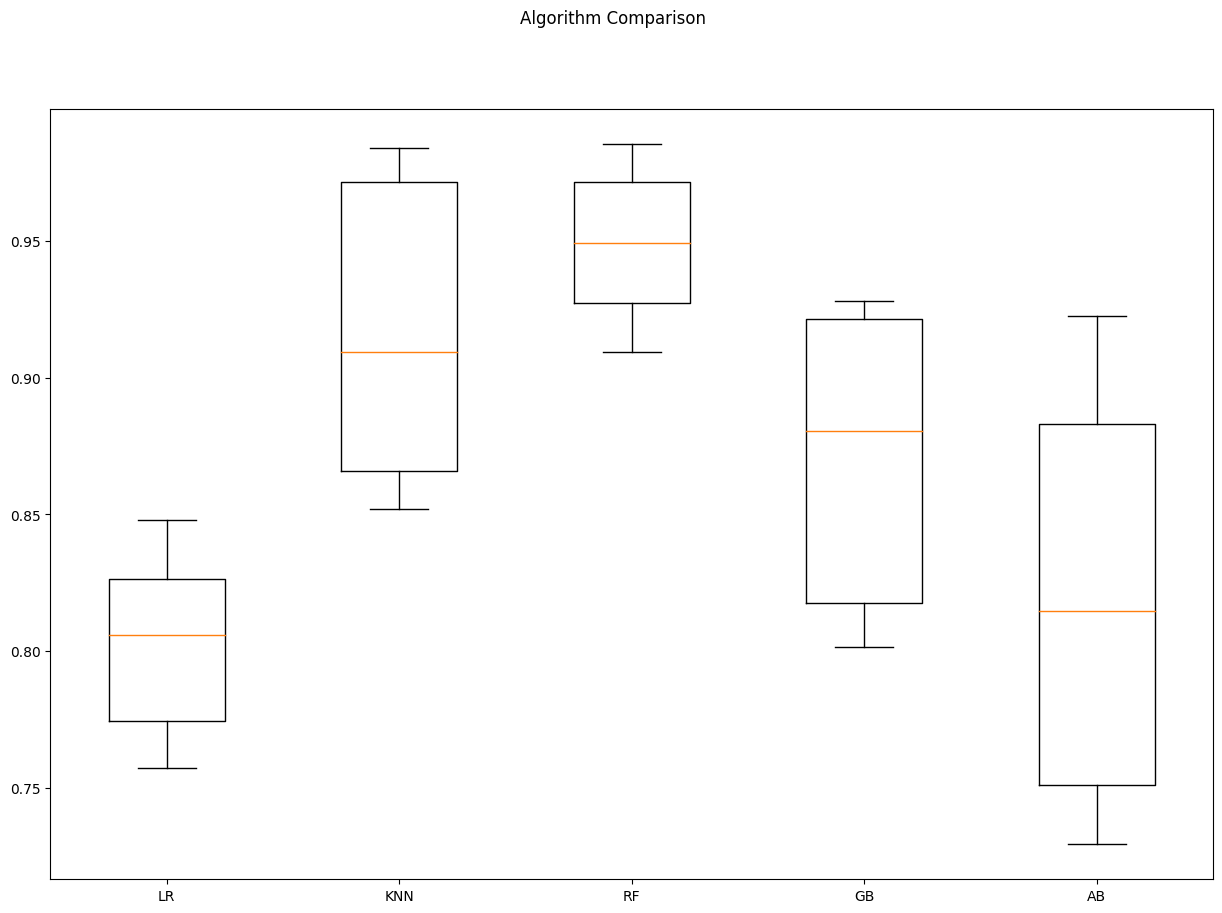

In [18]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####  KNN and Random Forest  are chosen. In addition, nuural network is investigated.

In [19]:
names

['LR', 'KNN', 'RF', 'GB', 'AB']

In [20]:
results

[array([0.75733333, 0.77333333, 0.75866667, 0.792     , 0.77703605,
        0.8317757 , 0.82242991, 0.84779706, 0.81975968, 0.82777036]),
 array([0.852     , 0.86533333, 0.868     , 0.86666667, 0.86248331,
        0.9506008 , 0.98397864, 0.9706275 , 0.98264352, 0.97196262]),
 array([0.91866667, 0.93333333, 0.92533333, 0.93333333, 0.90921228,
        0.96528705, 0.98531375, 0.9706275 , 0.97730307, 0.97196262]),
 array([0.80133333, 0.81466667, 0.80266667, 0.852     , 0.82643525,
        0.91855808, 0.92790387, 0.90921228, 0.92523364, 0.92256342]),
 array([0.73733333, 0.74933333, 0.72933333, 0.75866667, 0.75567423,
        0.88651535, 0.92256342, 0.91989319, 0.87049399, 0.87316422])]

In [21]:
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,LR,KNN,RF,GB,AB
0,0.757333,0.852000,0.918667,0.801333,0.737333
1,0.773333,0.865333,0.933333,0.814667,0.749333
2,0.758667,0.868000,0.925333,0.802667,0.729333
3,0.792000,0.866667,0.933333,0.852000,0.758667
4,0.777036,0.862483,0.909212,0.826435,0.755674
5,0.831776,0.950601,0.965287,0.918558,0.886515
6,0.822430,0.983979,0.985314,0.927904,0.922563
7,0.847797,0.970628,0.970628,0.909212,0.919893
8,0.819760,0.982644,0.977303,0.925234,0.870494
9,0.827770,0.971963,0.971963,0.922563,0.873164


In [22]:
score.to_csv('../data/score/rm_null/5_models/scores_5_models_accurate.csv', index=False)

#### recall

In [23]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names2 = []
results2 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results2 = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="recall")
    results2.append(cv_results2)
    names2.append(name)
    msg2 = f"{name}: {cv_results2.mean()} ({cv_results2.std()})"
    print(msg2)


LR: 0.7807554930563757 (0.05577486110958208)
KNN: 0.927767673960133 (0.06840031027400709)
RF: 0.8741952106530239 (0.12256994070647322)
GB: 0.785521283875499 (0.15321641146051415)
AB: 0.8045270586504932 (0.10251153599691612)


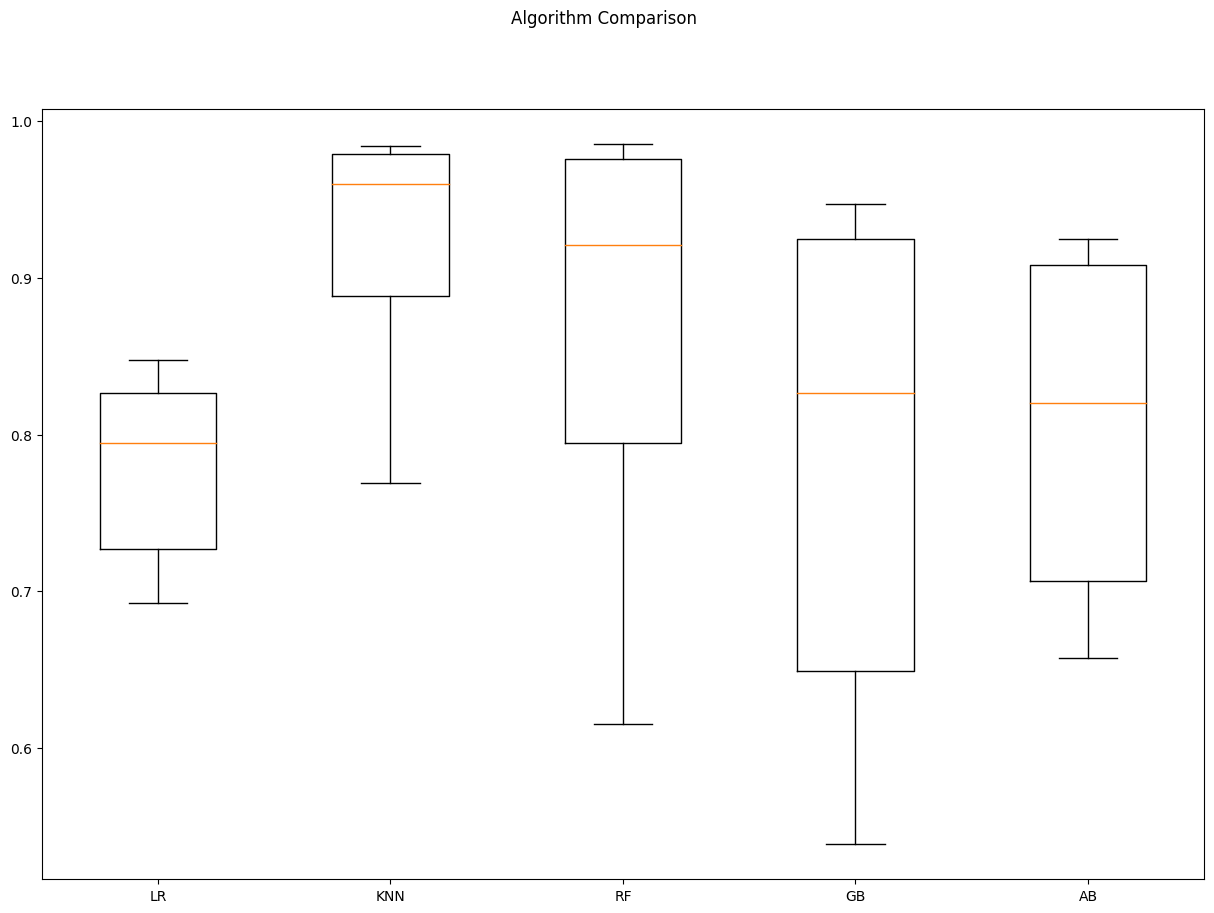

In [24]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [25]:
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,LR,KNN,RF,GB,AB
0,0.769231,0.769231,0.615385,0.538462,0.692308
1,0.692308,0.948718,0.871795,0.743590,0.769231
2,0.764706,0.941176,0.735294,0.617647,0.705882
3,0.714286,0.857143,0.857143,0.742857,0.657143
4,0.709677,0.870968,0.774194,0.580645,0.709677
5,0.839590,0.981229,0.982935,0.947099,0.924915
6,0.822430,0.983979,0.985314,0.927904,0.922563
7,0.847797,0.970628,0.970628,0.909212,0.919893
8,0.819760,0.982644,0.977303,0.925234,0.870494
9,0.827770,0.971963,0.971963,0.922563,0.873164


In [26]:
score2.to_csv('../data/score/rm_null/5_models/scores_5_models_recall.csv', index=False)

### Precision

In [27]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled3 = np.ascontiguousarray(X_resampled)
y_resampled3 = np.ascontiguousarray(y_resampled)

names3 = []
results3 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results3 = cross_val_score(model, X_resampled3, y_resampled3, cv=kfold, scoring="precision")
    results3.append(cv_results3)
    names3.append(name)
    msg3 = f"{name}: {cv_results3.mean()} ({cv_results3.std()})"
    print(msg3)


LR: 0.5585992378945638 (0.42969245851086824)
KNN: 0.6091145322037804 (0.3833814122377686)
RF: 0.6671733853356363 (0.3313630362600421)
GB: 0.5696051202252214 (0.42130859084424604)
AB: 0.5502806934047875 (0.43629714566334565)


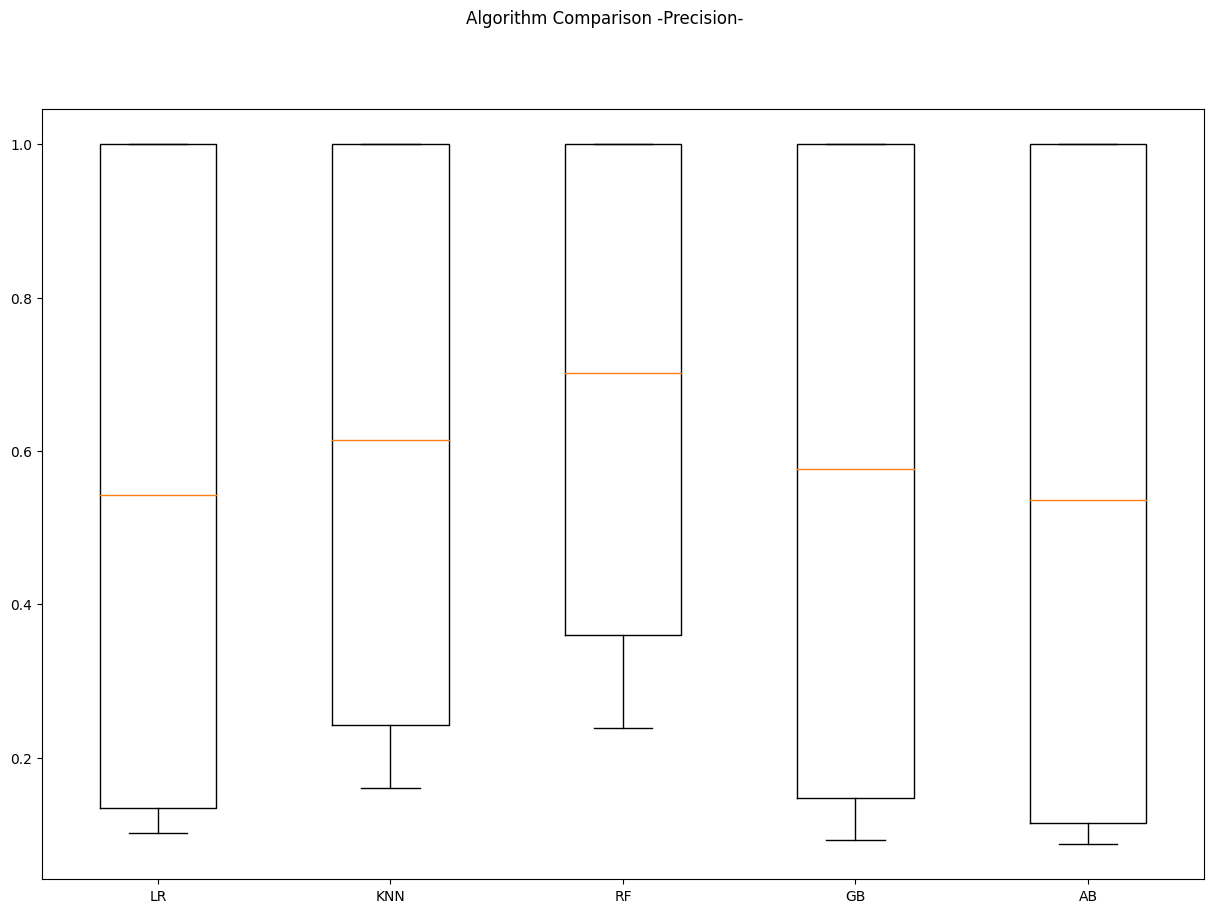

In [28]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison -Precision-')
ax = fig.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()

In [29]:
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,LR,KNN,RF,GB,AB
0,0.102041,0.160000,0.238806,0.092715,0.086957
1,0.145946,0.272059,0.430380,0.183544,0.143541
2,0.130653,0.248062,0.347222,0.134615,0.110599
3,0.146199,0.240000,0.400000,0.203125,0.119792
4,0.122222,0.214286,0.282353,0.133333,0.112245
5,0.938931,0.956739,0.972973,0.948718,0.929674
6,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
score3.to_csv('../data/score/rm_null/5_models/scores_5_models_precision.csv', index=False)

### f1

In [31]:
#evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled4 = np.ascontiguousarray(X_resampled)
y_resampled4 = np.ascontiguousarray(y_resampled)

names4 = []
results4 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results4 = cross_val_score(model, X_resampled4, y_resampled4, cv=kfold, scoring="f1")
    results4.append(cv_results4)
    names4.append(name)
    msg4 = f"{name}: {cv_results4.mean()} ({cv_results4.std()})"
    print(msg4)


LR: 0.5609081887490346 (0.3422380092545004)
KNN: 0.6722221129722519 (0.3147277692831473)
RF: 0.7281232329119144 (0.2647735656202479)
GB: 0.5993393312882332 (0.35979084661340505)
AB: 0.5692490332173897 (0.3730778145164856)


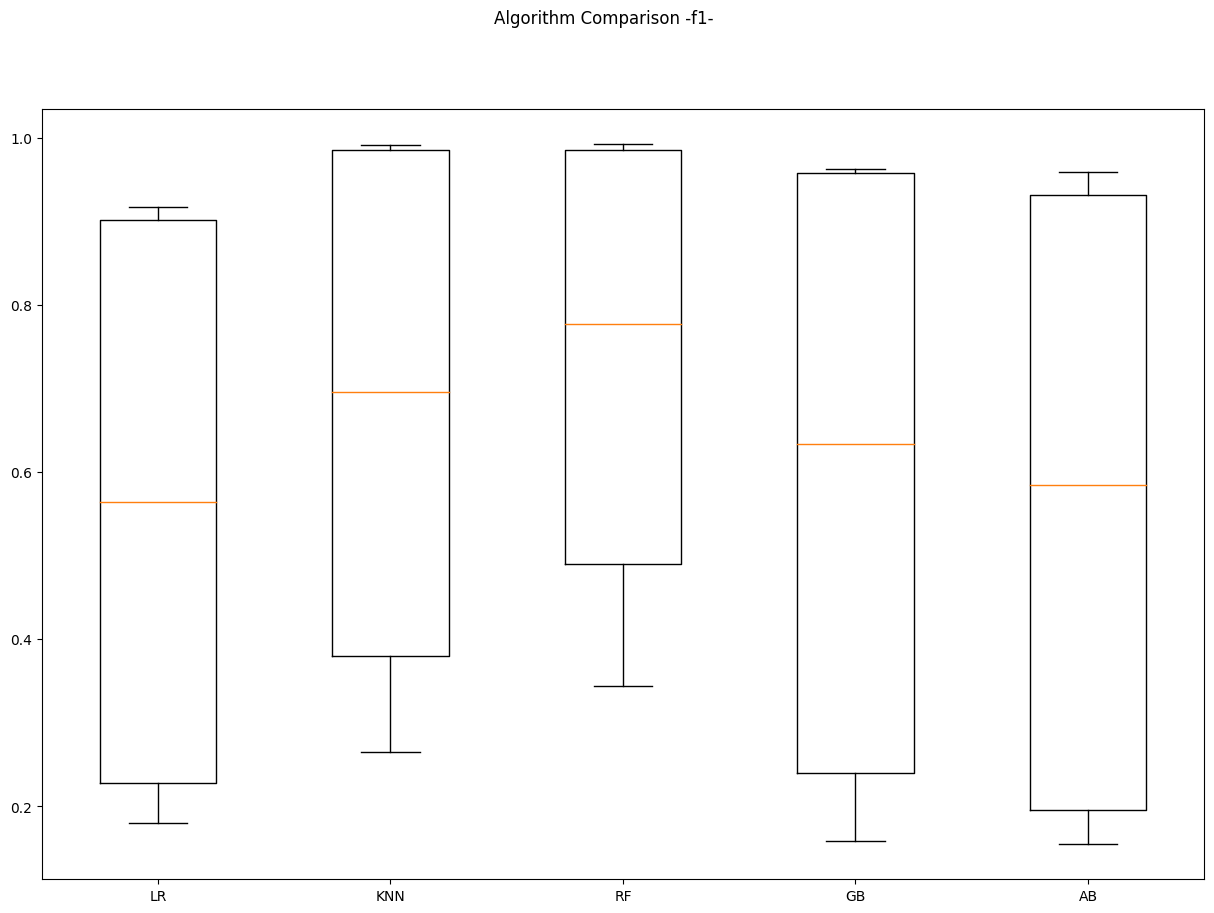

In [32]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison -f1-')
ax = fig.add_subplot(111)
plt.boxplot(results4)
ax.set_xticklabels(names4)
plt.show()

In [33]:
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,LR,KNN,RF,GB,AB
0,0.180180,0.264901,0.344086,0.158192,0.154506
1,0.241071,0.422857,0.576271,0.294416,0.241935
2,0.223176,0.392638,0.471698,0.221053,0.191235
3,0.242718,0.375000,0.545455,0.319018,0.202643
4,0.208531,0.343949,0.413793,0.216867,0.193833
5,0.886486,0.968829,0.977929,0.947908,0.927288
6,0.902564,0.991925,0.992603,0.962604,0.959722
7,0.917630,0.985095,0.985095,0.952448,0.958275
8,0.900954,0.991246,0.988521,0.961165,0.930764
9,0.905771,0.985782,0.985782,0.959722,0.932288


In [34]:
score4.to_csv('../data/score/rm_null/5_models/scores_5_models_f1.csv', index=False)